# Analysis on Global Airline Safety 

## Mitchell Riggan

## About the data 

This data was downloaded from a github repository by "jayb", here is the link [Airline Safety Data](
https://github.com/fivethirtyeight/data/blob/master/airline-safety/airline-safety.csv)
It contains data about incidents, fatal accidents, total fatalities for two periods between 1985-1999 a registered airline companies throughout the world

# Questions to be answered
1. Which company has the highest fatalities from both time periods?
2. Which companies has the highest incidents from both time periods?
3. Which company have the most available seat kilometers flown every week  and are the safest (low incident)

In [29]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd

df = pd.read_csv('s3://ia340-2024fall-2-686960/airline-safety.csv') # load the data from s3
df.head() #show the top 5 rows

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0
1,Aeroflot*,1197672318,76,14,128,6,1,88
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0
4,Air Canada,1865253802,2,0,0,2,0,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   airline                 56 non-null     object
 1   avail_seat_km_per_week  56 non-null     int64 
 2   incidents_85_99         56 non-null     int64 
 3   fatal_accidents_85_99   56 non-null     int64 
 4   fatalities_85_99        56 non-null     int64 
 5   incidents_00_14         56 non-null     int64 
 6   fatal_accidents_00_14   56 non-null     int64 
 7   fatalities_00_14        56 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 3.6+ KB


In [3]:
df.isnull().sum()

airline                   0
avail_seat_km_per_week    0
incidents_85_99           0
fatal_accidents_85_99     0
fatalities_85_99          0
incidents_00_14           0
fatal_accidents_00_14     0
fatalities_00_14          0
dtype: int64

In [4]:
df = df.dropna()
df.isnull().sum()

airline                   0
avail_seat_km_per_week    0
incidents_85_99           0
fatal_accidents_85_99     0
fatalities_85_99          0
incidents_00_14           0
fatal_accidents_00_14     0
fatalities_00_14          0
dtype: int64

In [5]:
df.value_counts() 

airline                     avail_seat_km_per_week  incidents_85_99  fatal_accidents_85_99  fatalities_85_99  incidents_00_14  fatal_accidents_00_14  fatalities_00_14
Aer Lingus                  320906734               2                0                      0                 0                0                      0                   1
Aeroflot*                   1197672318              76               14                     128               6                1                      88                  1
Kenya Airways               277414794               2                0                      0                 2                2                      283                 1
Korean Air                  1734522605              12               5                      425               1                0                      0                   1
LAN Airlines                1001965891              3                2                      21                0                0                 

<Axes: xlabel='airline'>

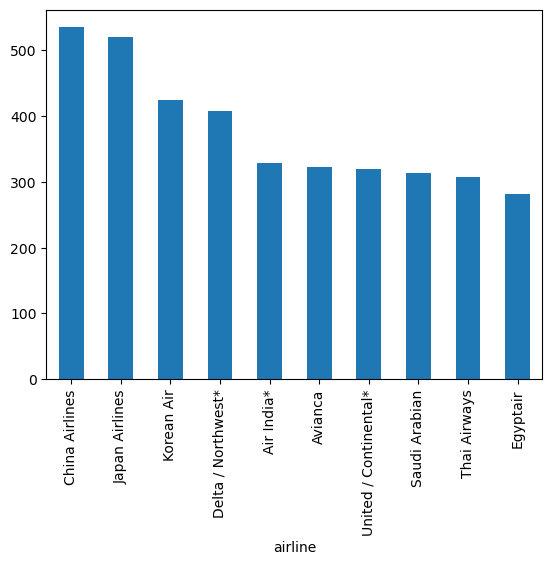

In [6]:
sum_deaths_by_airline8599 = df.groupby('airline')['fatalities_85_99'].sum() 
sum_deaths_by_airline8599.nlargest(10).plot.bar() 

<Axes: xlabel='airline'>

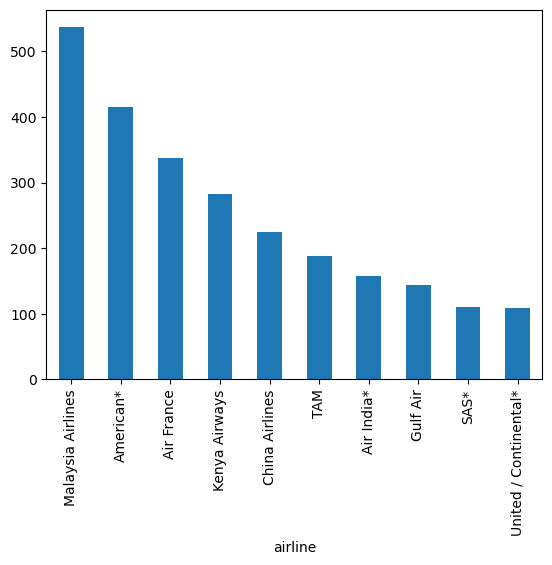

In [7]:
sum_deaths_by_airline0014 = df.groupby('airline')['fatalities_00_14'].sum() 
sum_deaths_by_airline0014.nlargest(10).plot.bar() 

<Axes: xlabel='airline'>

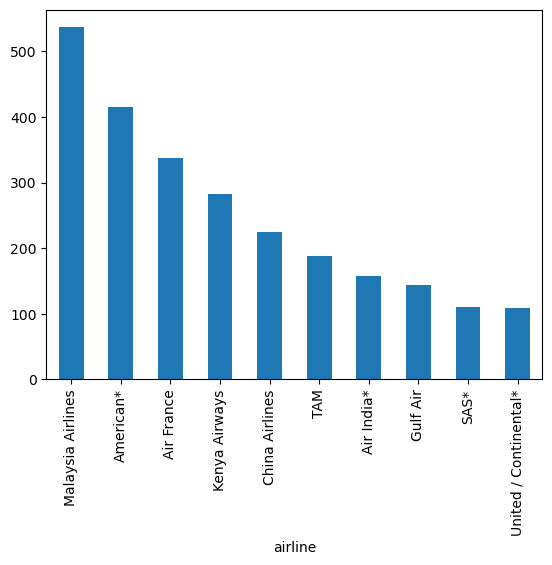

In [8]:
sum_deaths_by_airline0014 = df.groupby('airline')['fatalities_00_14'].sum() 
sum_deaths_by_airline0014.nlargest(10).plot.bar() 

<Axes: xlabel='airline'>

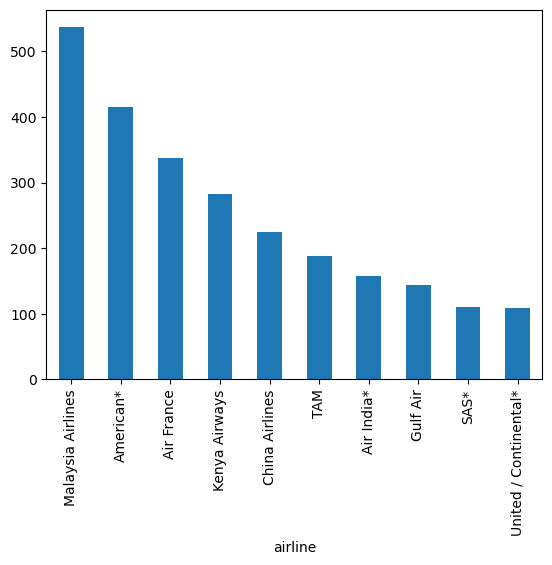

In [9]:
sum_deaths_by_airline0014 = df.groupby('airline')['fatalities_00_14'].sum() 
sum_deaths_by_airline0014.nlargest(10).plot.bar() 

In [10]:
pip install jupyter-ai~=1.0

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install jupyter-ai[all]

Note: you may need to restart the kernel to use updated packages.


In [12]:
import boto3
from botocore.exceptions import ClientError
import json

def get_secret(secret_name):
    region_name = "us-east-1"

    # Create a Secrets Manager client
    session = boto3.session.Session()
    client = session.client(
        service_name='secretsmanager',
        region_name=region_name
    )

    try:
        get_secret_value_response = client.get_secret_value(
            SecretId=secret_name
        )
    except ClientError as e:
        raise e

    secret = get_secret_value_response['SecretString']
    
    return json.loads(secret)

In [13]:
import psycopg2

conn = psycopg2.connect(host=get_secret('postgresql')['host'],
                      user=get_secret('postgresql')['username'],
                      password = get_secret('postgresql')['password'],
                      dbname=get_secret('postgresql')['engine'])

cur = conn.cursor()

In [14]:
import os
os.environ["OPENAI_API_KEY"] = get_secret('openai')['api_key']

In [15]:

%load_ext jupyter_ai_magics

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


In [16]:
%ai list

| Provider | Environment variable | Set? | Models |
|----------|----------------------|------|--------|
| `ai21` | `AI21_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`ai21:j1-large`</li><li>`ai21:j1-grande`</li><li>`ai21:j1-jumbo`</li><li>`ai21:j1-grande-instruct`</li><li>`ai21:j2-large`</li><li>`ai21:j2-grande`</li><li>`ai21:j2-jumbo`</li><li>`ai21:j2-grande-instruct`</li><li>`ai21:j2-jumbo-instruct`</li></ul> |
| `bedrock` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | <ul><li>`bedrock:amazon.titan-text-express-v1`</li><li>`bedrock:amazon.titan-text-lite-v1`</li><li>`bedrock:amazon.titan-text-premier-v1:0`</li><li>`bedrock:ai21.j2-ultra-v1`</li><li>`bedrock:ai21.j2-mid-v1`</li><li>`bedrock:ai21.jamba-instruct-v1:0`</li><li>`bedrock:cohere.command-light-text-v14`</li><li>`bedrock:cohere.command-text-v14`</li><li>`bedrock:cohere.command-r-v1:0`</li><li>`bedrock:cohere.command-r-plus-v1:0`</li><li>`bedrock:meta.llama2-13b-chat-v1`</li><li>`bedrock:meta.llama2-70b-chat-v1`</li><li>`bedrock:meta.llama3-8b-instruct-v1:0`</li><li>`bedrock:meta.llama3-70b-instruct-v1:0`</li><li>`bedrock:meta.llama3-1-8b-instruct-v1:0`</li><li>`bedrock:meta.llama3-1-70b-instruct-v1:0`</li><li>`bedrock:meta.llama3-1-405b-instruct-v1:0`</li><li>`bedrock:mistral.mistral-7b-instruct-v0:2`</li><li>`bedrock:mistral.mixtral-8x7b-instruct-v0:1`</li><li>`bedrock:mistral.mistral-large-2402-v1:0`</li><li>`bedrock:mistral.mistral-large-2407-v1:0`</li></ul> |
| `bedrock-chat` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | <ul><li>`bedrock-chat:amazon.titan-text-express-v1`</li><li>`bedrock-chat:amazon.titan-text-lite-v1`</li><li>`bedrock-chat:amazon.titan-text-premier-v1:0`</li><li>`bedrock-chat:anthropic.claude-v2`</li><li>`bedrock-chat:anthropic.claude-v2:1`</li><li>`bedrock-chat:anthropic.claude-instant-v1`</li><li>`bedrock-chat:anthropic.claude-3-sonnet-20240229-v1:0`</li><li>`bedrock-chat:anthropic.claude-3-haiku-20240307-v1:0`</li><li>`bedrock-chat:anthropic.claude-3-opus-20240229-v1:0`</li><li>`bedrock-chat:anthropic.claude-3-5-sonnet-20240620-v1:0`</li><li>`bedrock-chat:meta.llama2-13b-chat-v1`</li><li>`bedrock-chat:meta.llama2-70b-chat-v1`</li><li>`bedrock-chat:meta.llama3-8b-instruct-v1:0`</li><li>`bedrock-chat:meta.llama3-70b-instruct-v1:0`</li><li>`bedrock-chat:meta.llama3-1-8b-instruct-v1:0`</li><li>`bedrock-chat:meta.llama3-1-70b-instruct-v1:0`</li><li>`bedrock-chat:meta.llama3-1-405b-instruct-v1:0`</li><li>`bedrock-chat:mistral.mistral-7b-instruct-v0:2`</li><li>`bedrock-chat:mistral.mixtral-8x7b-instruct-v0:1`</li><li>`bedrock-chat:mistral.mistral-large-2402-v1:0`</li><li>`bedrock-chat:mistral.mistral-large-2407-v1:0`</li></ul> |
| `bedrock-custom` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | Specify the ARN (Amazon Resource Name) of the custom/provisioned model as the model ID. For more information, see the [Amazon Bedrock model IDs documentation](https://docs.aws.amazon.com/bedrock/latest/userguide/model-ids.html).

The model provider must also be specified below. This is the provider of your foundation model *in lowercase*, e.g. `amazon`, `anthropic`, `meta`, or `mistral`. |
| `anthropic` | `ANTHROPIC_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`anthropic:claude-v1`</li><li>`anthropic:claude-v1.0`</li><li>`anthropic:claude-v1.2`</li><li>`anthropic:claude-2`</li><li>`anthropic:claude-2.0`</li><li>`anthropic:claude-instant-v1`</li><li>`anthropic:claude-instant-v1.0`</li><li>`anthropic:claude-instant-v1.2`</li></ul> |
| `anthropic-chat` | `ANTHROPIC_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`anthropic-chat:claude-2.0`</li><li>`anthropic-chat:claude-2.1`</li><li>`anthropic-chat:claude-instant-1.2`</li><li>`anthropic-chat:claude-3-opus-20240229`</li><li>`anthropic-chat:claude-3-sonnet-20240229`</li><li>`anthropic-chat:claude-3-haiku-20240307`</li><li>`anthropic-chat:claude-3-5-sonnet-20240620`</li></ul> |
| `azure-chat-openai` | `AZURE_OPENAI_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | This provider does not define a list of models. |
| `cohere` | `COHERE_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`cohere:command`</li><li>`cohere:command-nightly`</li><li>`cohere:command-light`</li><li>`cohere:command-light-nightly`</li><li>`cohere:command-r-plus`</li><li>`cohere:command-r`</li></ul> |
| `gemini` | `GOOGLE_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`gemini:gemini-1.5-pro`</li><li>`gemini:gemini-1.5-flash`</li><li>`gemini:gemini-1.0-pro`</li><li>`gemini:gemini-1.0-pro-001`</li><li>`gemini:gemini-1.0-pro-latest`</li><li>`gemini:gemini-1.0-pro-vision-latest`</li><li>`gemini:gemini-pro`</li><li>`gemini:gemini-pro-vision`</li></ul> |
| `gpt4all` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | <ul><li>`gpt4all:ggml-gpt4all-j-v1.2-jazzy`</li><li>`gpt4all:ggml-gpt4all-j-v1.3-groovy`</li><li>`gpt4all:ggml-gpt4all-l13b-snoozy`</li><li>`gpt4all:mistral-7b-openorca.Q4_0`</li><li>`gpt4all:mistral-7b-instruct-v0.1.Q4_0`</li><li>`gpt4all:gpt4all-falcon-q4_0`</li><li>`gpt4all:wizardlm-13b-v1.2.Q4_0`</li><li>`gpt4all:nous-hermes-llama2-13b.Q4_0`</li><li>`gpt4all:gpt4all-13b-snoozy-q4_0`</li><li>`gpt4all:mpt-7b-chat-merges-q4_0`</li><li>`gpt4all:orca-mini-3b-gguf2-q4_0`</li><li>`gpt4all:starcoder-q4_0`</li><li>`gpt4all:rift-coder-v0-7b-q4_0`</li><li>`gpt4all:em_german_mistral_v01.Q4_0`</li></ul> |
| `huggingface_hub` | `HUGGINGFACEHUB_API_TOKEN` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | See [https://huggingface.co/models](https://huggingface.co/models) for a list of models. Pass a model's repository ID as the model ID; for example, `huggingface_hub:ExampleOwner/example-model`. |
| `mistralai` | `MISTRAL_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`mistralai:open-mistral-7b`</li><li>`mistralai:open-mixtral-8x7b`</li><li>`mistralai:open-mixtral-8x22b`</li><li>`mistralai:mistral-small-latest`</li><li>`mistralai:mistral-medium-latest`</li><li>`mistralai:mistral-large-latest`</li><li>`mistralai:codestral-latest`</li></ul> |
| `nvidia-chat` | `NVIDIA_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`nvidia-chat:playground_llama2_70b`</li><li>`nvidia-chat:playground_nemotron_steerlm_8b`</li><li>`nvidia-chat:playground_mistral_7b`</li><li>`nvidia-chat:playground_nv_llama2_rlhf_70b`</li><li>`nvidia-chat:playground_llama2_13b`</li><li>`nvidia-chat:playground_steerlm_llama_70b`</li><li>`nvidia-chat:playground_llama2_code_13b`</li><li>`nvidia-chat:playground_yi_34b`</li><li>`nvidia-chat:playground_mixtral_8x7b`</li><li>`nvidia-chat:playground_neva_22b`</li><li>`nvidia-chat:playground_llama2_code_34b`</li></ul> |
| `ollama` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | See [https://www.ollama.com/library](https://www.ollama.com/library) for a list of models. Pass a model's name; for example, `deepseek-coder-v2`. |
| `openai` | `OPENAI_API_KEY` | <abbr title="You have set this environment variable, so you can use this provider's models.">✅</abbr> | <ul><li>`openai:babbage-002`</li><li>`openai:davinci-002`</li><li>`openai:gpt-3.5-turbo-instruct`</li></ul> |
| `openai-chat` | `OPENAI_API_KEY` | <abbr title="You have set this environment variable, so you can use this provider's models.">✅</abbr> | <ul><li>`openai-chat:gpt-3.5-turbo`</li><li>`openai-chat:gpt-3.5-turbo-0125`</li><li>`openai-chat:gpt-3.5-turbo-0301`</li><li>`openai-chat:gpt-3.5-turbo-0613`</li><li>`openai-chat:gpt-3.5-turbo-1106`</li><li>`openai-chat:gpt-3.5-turbo-16k`</li><li>`openai-chat:gpt-3.5-turbo-16k-0613`</li><li>`openai-chat:gpt-4`</li><li>`openai-chat:gpt-4-turbo`</li><li>`openai-chat:gpt-4-turbo-preview`</li><li>`openai-chat:gpt-4-0613`</li><li>`openai-chat:gpt-4-32k`</li><li>`openai-chat:gpt-4-32k-0613`</li><li>`openai-chat:gpt-4-0125-preview`</li><li>`openai-chat:gpt-4-1106-preview`</li><li>`openai-chat:gpt-4o`</li><li>`openai-chat:gpt-4o-mini`</li></ul> |
| `openrouter` | `OPENROUTER_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | This provider does not define a list of models. |
| `qianfan` | `QIANFAN_AK`, `QIANFAN_SK` | <abbr title="You have not set all of these environment variables, so you cannot use this provider's models.">❌</abbr> | <ul><li>`qianfan:ERNIE-Bot`</li><li>`qianfan:ERNIE-Bot-4`</li></ul> |
| `sagemaker-endpoint` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | Specify an endpoint name as the model ID. In addition, you must specify a region name, request schema, and response path. For more information, see the documentation about [SageMaker endpoints deployment](https://docs.aws.amazon.com/sagemaker/latest/dg/realtime-endpoints-deploy-models.html) and about [using magic commands with SageMaker endpoints](https://jupyter-ai.readthedocs.io/en/latest/users/index.html#using-magic-commands-with-sagemaker-endpoints). |
| `togetherai` | `TOGETHER_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`togetherai:Austism/chronos-hermes-13b`</li><li>`togetherai:DiscoResearch/DiscoLM-mixtral-8x7b-v2`</li><li>`togetherai:EleutherAI/llemma_7b`</li><li>`togetherai:Gryphe/MythoMax-L2-13b`</li><li>`togetherai:Meta-Llama/Llama-Guard-7b`</li><li>`togetherai:Nexusflow/NexusRaven-V2-13B`</li><li>`togetherai:NousResearch/Nous-Capybara-7B-V1p9`</li><li>`togetherai:NousResearch/Nous-Hermes-2-Yi-34B`</li><li>`togetherai:NousResearch/Nous-Hermes-Llama2-13b`</li><li>`togetherai:NousResearch/Nous-Hermes-Llama2-70b`</li></ul> |

Aliases and custom commands:

| Name | Target |
|------|--------|
| `gpt2` | `huggingface_hub:gpt2` |
| `gpt3` | `openai:davinci-002` |
| `chatgpt` | `openai-chat:gpt-3.5-turbo` |
| `gpt4` | `openai-chat:gpt-4` |
| `ernie-bot` | `qianfan:ERNIE-Bot` |
| `ernie-bot-4` | `qianfan:ERNIE-Bot-4` |
| `titan` | `bedrock:amazon.titan-tg1-large` |
| `openrouter-claude` | `openrouter:anthropic/claude-3.5-sonnet:beta` |


In [22]:
df.value_counts() 

airline                     avail_seat_km_per_week  incidents_85_99  fatal_accidents_85_99  fatalities_85_99  incidents_00_14  fatal_accidents_00_14  fatalities_00_14
Aer Lingus                  320906734               2                0                      0                 0                0                      0                   1
Aeroflot*                   1197672318              76               14                     128               6                1                      88                  1
Kenya Airways               277414794               2                0                      0                 2                2                      283                 1
Korean Air                  1734522605              12               5                      425               1                0                      0                   1
LAN Airlines                1001965891              3                2                      21                0                0                 

In [24]:
%%ai gpt4 -f code
Which airline had the most fatlities in both fatalities_85_99 and the highest fatalities_00_14 in {df}

In [19]:
import pandas as pd


df = pd.DataFrame(df)

highest_fatalities_85_99 = df[df['fatalities_85_99'] == df['fatalities_85_99'].max()]['airline'].values[0]
highest_fatalities_00_14 = df[df['fatalities_00_14'] == df['fatalities_00_14'].max()]['airline'].values[0]
highest_fatalities_85_99, highest_fatalities_00_14

('China Airlines', 'Malaysia Airlines')

In [28]:
%%ai gpt4 
which airline had the most fatlities in between fatalities_85_99 and for fatalities_00_14 in {df} 

The airline with the most fatalities in both periods (1985-1999 and 2000-2014) is **China Airlines** with a total of **760** fatalities (535 from 1985-1999 and 225 from 2000-2014).

## AI was able to find that the answer to Question 1  is the China Airline with the most total fatalities from both eras?

In [31]:
%%ai gpt4 -f code
write code to measure the airline highest fatal_accidents_00_14 and fatal_accidents_85_99 in {In(22)}
and visualize top ten highest for each on bar graphs

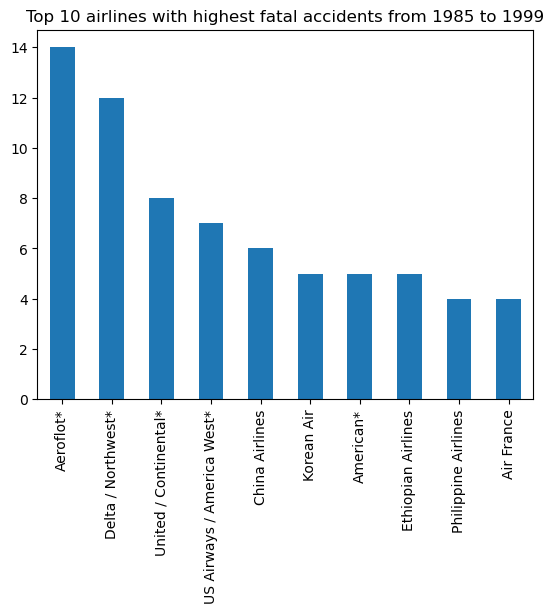

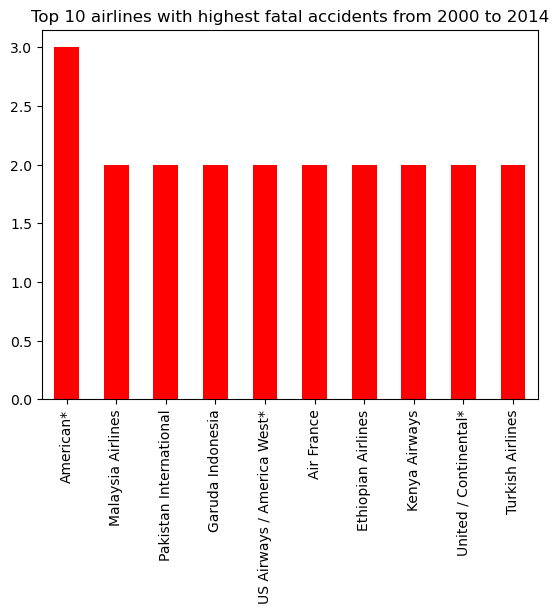

In [32]:
# Assuming the dataframe is named df

# Sorting and getting top 10 for fatal accidents from 85 to 99
top_10_fatal_85_99 = df.sort_values(by='fatal_accidents_85_99', ascending=False).head(10)

# Sorting and getting top 10 for fatal accidents from 00 to 14
top_10_fatal_00_14 = df.sort_values(by='fatal_accidents_00_14', ascending=False).head(10)

# Plotting the top 10 airlines with highest fatal accidents from 1985 to 1999
top_10_fatal_85_99.plot(x='airline', y='fatal_accidents_85_99', kind='bar', legend=False)
plt.xlabel(None)
plt.title('Top 10 airlines with highest fatal accidents from 1985 to 1999')
plt.show()

# Plotting the top 10 airlines with highest fatal accidents from 2000 to 2014
top_10_fatal_00_14.plot(x='airline', y='fatal_accidents_00_14', kind='bar', legend=False, color='red')
plt.xlabel(None)
plt.title('Top 10 airlines with highest fatal accidents from 2000 to 2014')
plt.show()

In [34]:
%%ai gpt4 
which airline had the most fatal accidents in between fatal_accidents_85_99 and for fatal_accidents_00_14 in {df} 

For the period 1985-1999, the airline with the most fatal accidents is **Aeroflot*** with 14 fatal accidents.

For the period 2000-2014, the airline with the most fatal accidents is **American*** with 3 fatal accidents.

## AI was able to find the answer to Question 2 by showing that Aeroflot had the most fatal accidents in 85-99 and American had the most fatl accidents in 00-14

In [75]:
%%ai gpt4 -f code
write code to display airlines with the max from avail_seat_km_per_week  and with the min from lowest incidents_85_99 and the min from the lowest incidents_00_14 in {df}
list top 20 while only displaying those three variables

In [76]:
# Assuming the data is in a DataFrame 'df'

# Find the airline with maximum 'avail_seat_km_per_week'
max_avail_seat = df[df['avail_seat_km_per_week'] == df['avail_seat_km_per_week'].max()]

# Find the airlines with minimum 'incidents_85_99'
min_incidents_85_99 = df[df['incidents_85_99'] == df['incidents_85_99'].min()]

# Find the airlines with minimum 'incidents_00_14'
min_incidents_00_14 = df[df['incidents_00_14'] == df['incidents_00_14'].min()]

# Concatenate the three dataframes
result = pd.concat([max_avail_seat, min_incidents_85_99, min_incidents_00_14])

# Sort by 'avail_seat_km_per_week' and get top 20
result = result.sort_values('avail_seat_km_per_week', ascending=False).head(20)

# Only display 'airline', 'avail_seat_km_per_week', 'incidents_85_99', 'incidents_00_14' columns
result = result[['airline', 'avail_seat_km_per_week', 'incidents_85_99', 'incidents_00_14']]

print(result)

                  airline  avail_seat_km_per_week  incidents_85_99  \
51  United / Continental*              7139291291               19   
15        Cathay Pacific*              2582459303                0   
28         Japan Airlines              1574217531                3   
54        Virgin Atlantic              1005248585                1   
32           LAN Airlines              1001965891                3   
48     TAP - Air Portugal               619130754                0   
48     TAP - Air Portugal               619130754                0   
18                   COPA               550491507                3   
23                Finnair               506464950                1   
26      Hawaiian Airlines               493877795                0   
17                 Condor               417982610                2   
13                Avianca               396922563                5   
0              Aer Lingus               320906734                2   

    incidents_00_14

## AI was able to find the answer for Question 3 by showing that United / Contiental has the highest available seating with the lowest incident rates between both eras, making them the safest, most available airline